### Importing Libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [226]:
#Importing Data
df=pd.read_csv("creditcarddata.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exporatory Data Analysis

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [161]:
df.shape

(284807, 31)

In [162]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [163]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

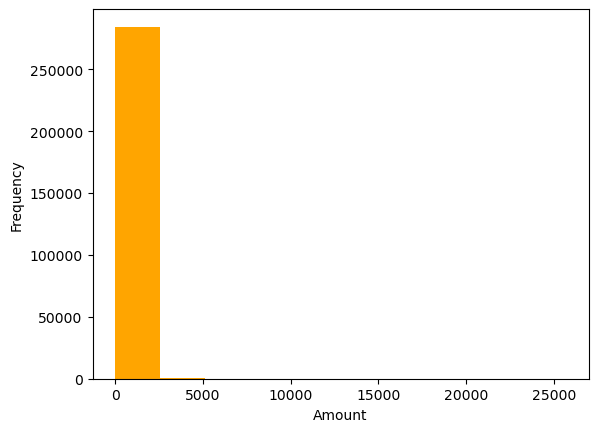

In [164]:
plt.hist(df['Amount'],color="Orange")
plt.xlabel('Amount', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

Text(0, 0.5, 'Frequency')

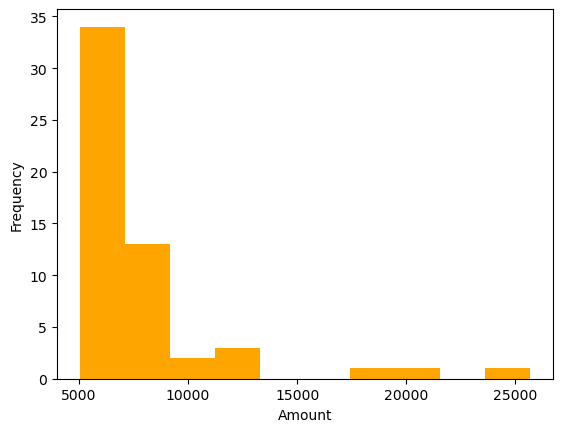

In [165]:
df_mod=df[df['Amount']>=5000]
plt.hist(df_mod['Amount'],color="Orange")
plt.xlabel('Amount', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

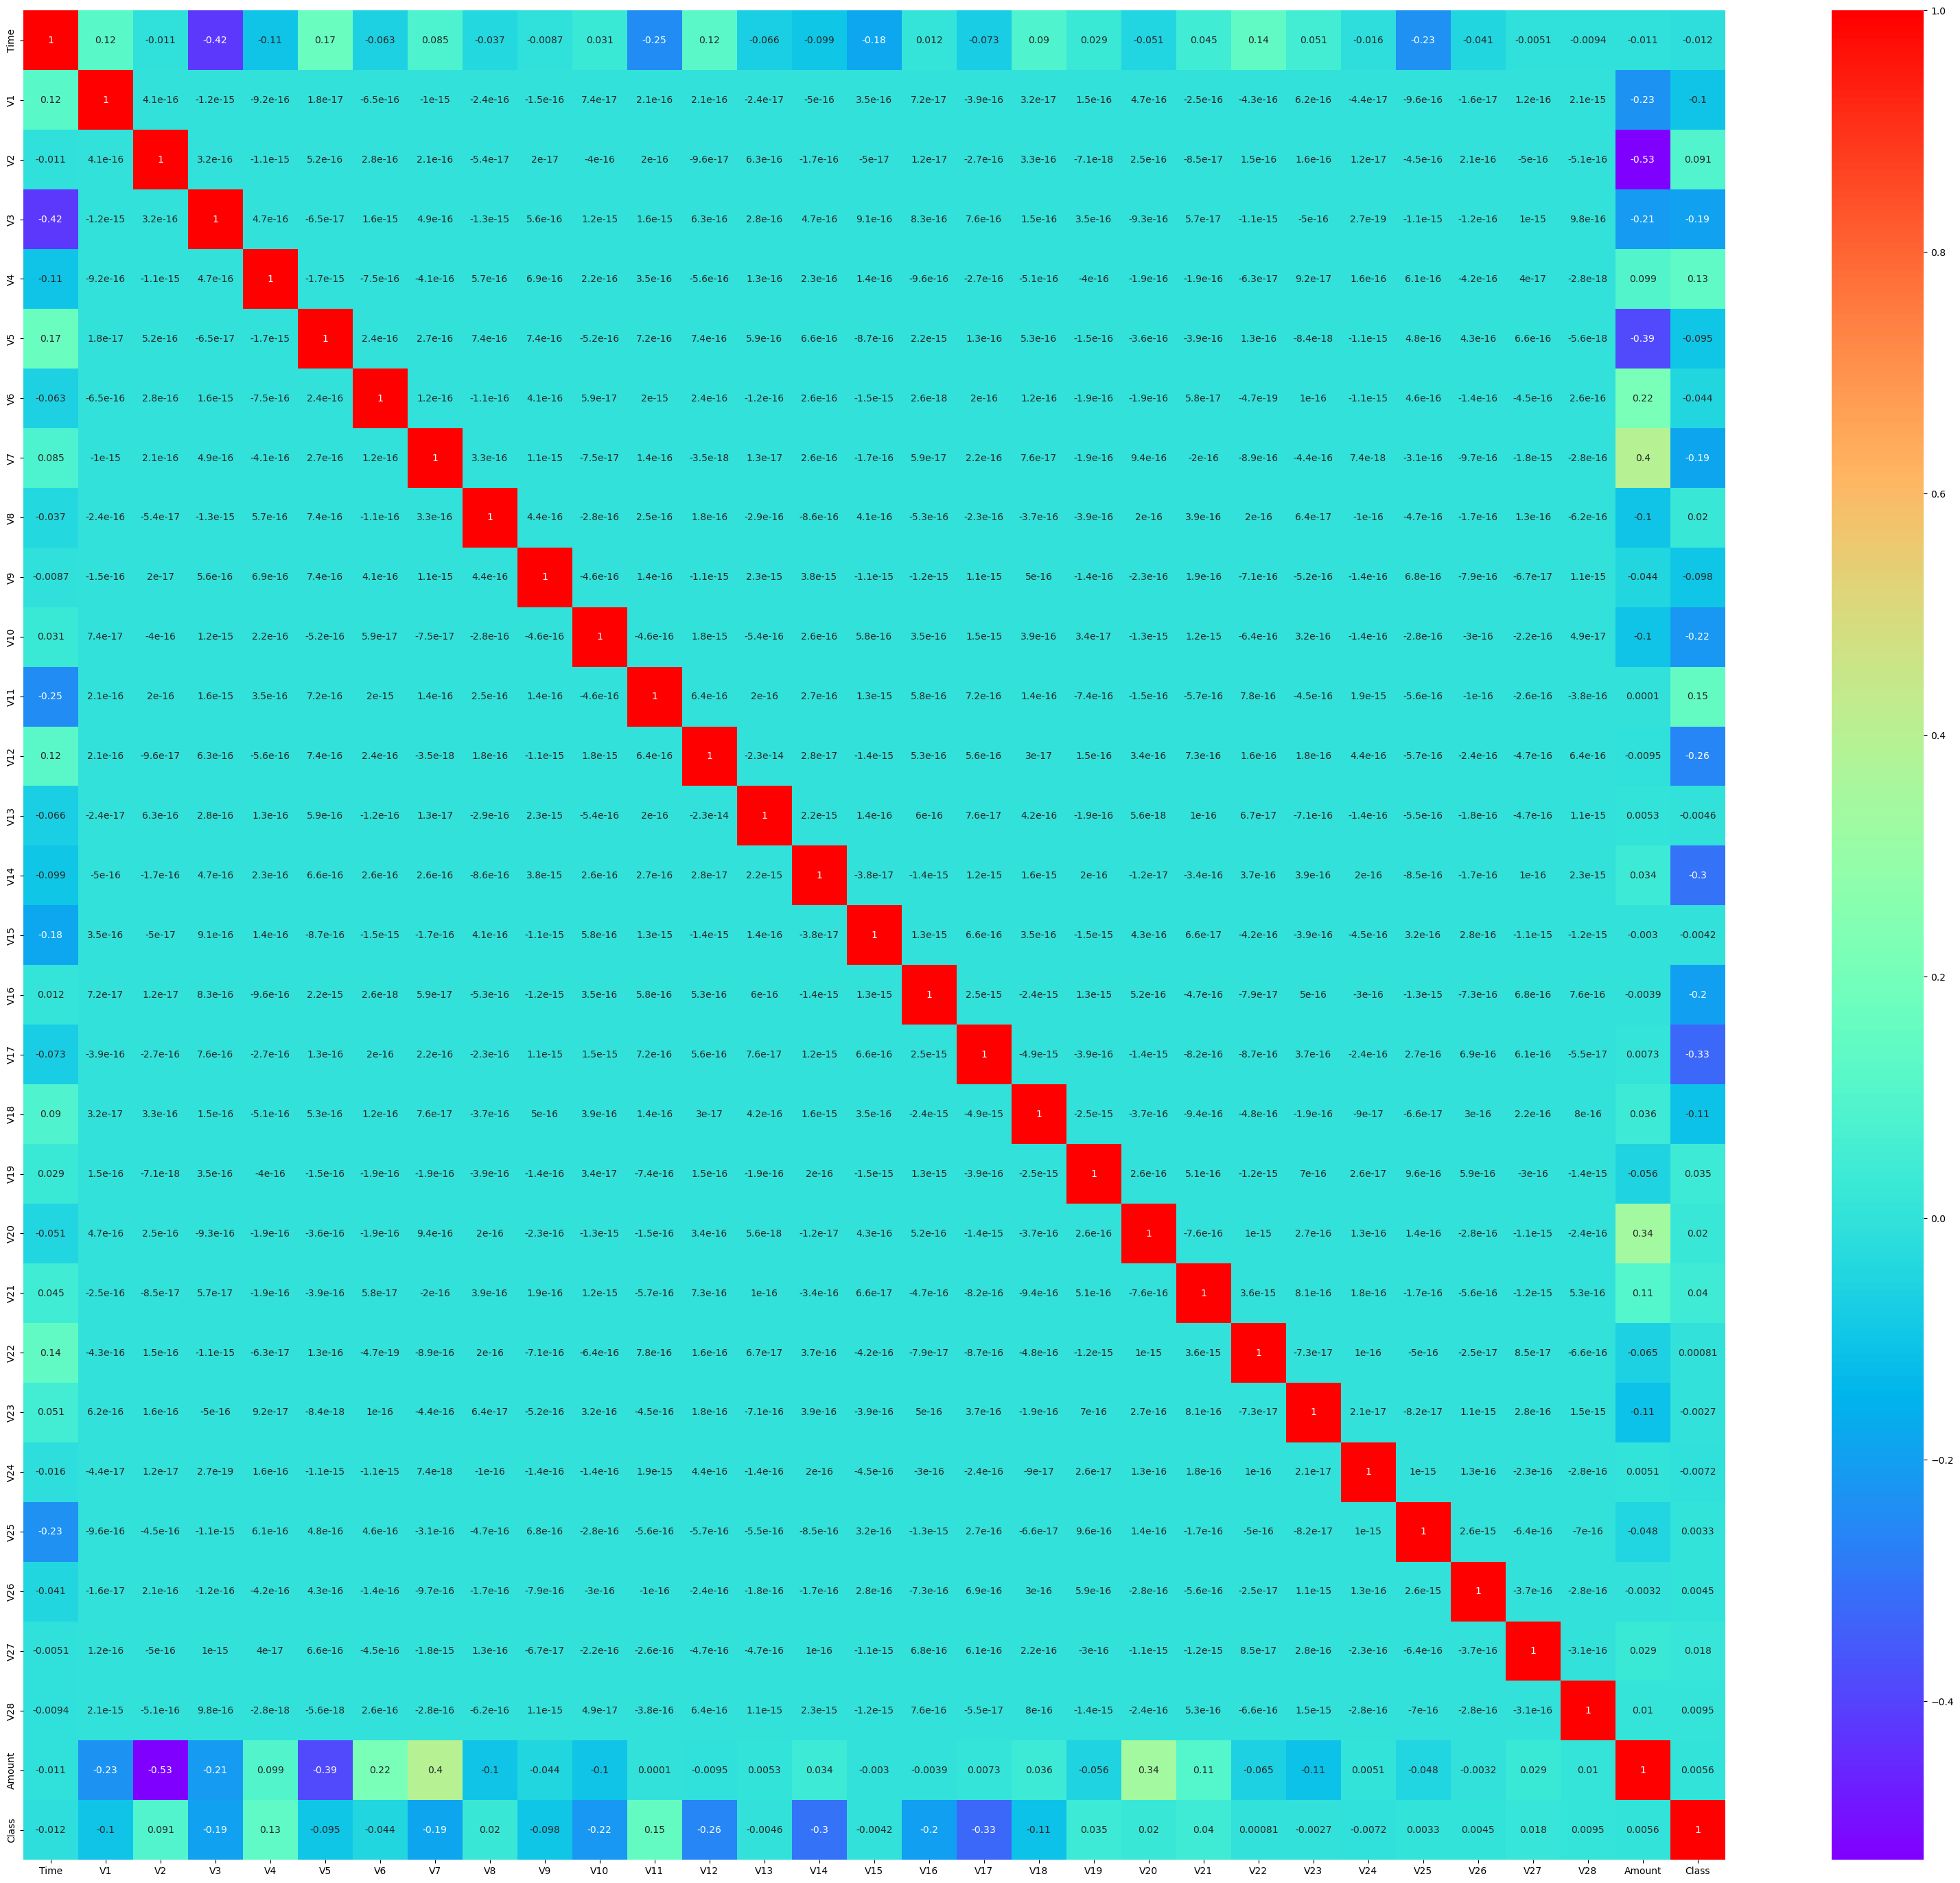

In [166]:
plt.figure(figsize = (40,35))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')
plt.show()


<h2>Indication from Heatmap:<h2>
<h3>1. There is positive correlation betweenV7, V20 and Amount column. <br />
2.There is negative correlation between V2,V5 and Amount column. <br />
3.There is negative correlation between V14,V17 and Class column.<h3>

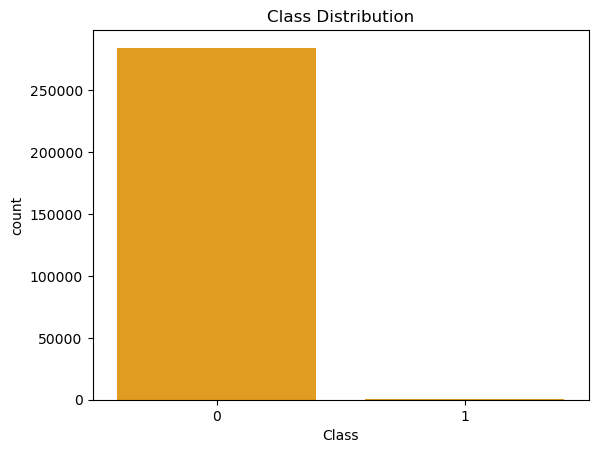

In [168]:
sns.countplot(x='Class', data=df, color = "Orange")
plt.title('Class Distribution')
plt.show()

In [169]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [170]:
genuine = df[df.Class == 0]
fraud = df[df.Class == 1]

In [171]:
genuine

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [172]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


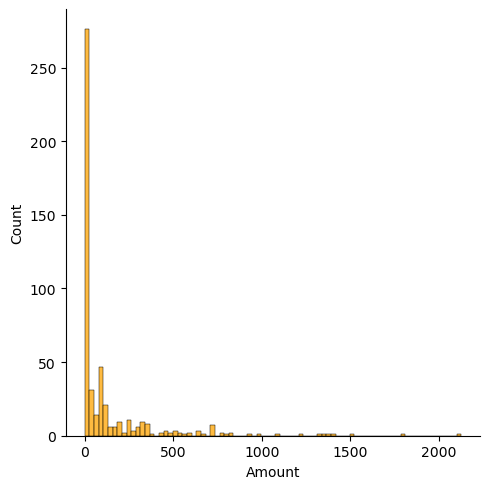

In [173]:
sns.displot(x=fraud['Amount'],color="Orange")

In [174]:
print("Shape of Genuine & Fraud Transaction Data")
print("  Genuine Transactions : ",genuine.shape)
print("  Fraud Transactions   : ", fraud.shape)

Shape of Genuine & Fraud Transaction Data
  Genuine Transactions :  (284315, 31)
  Fraud Transactions   :  (492, 31)


In [175]:
# comparing the mean value for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [176]:
# random selection of 492 rows
genuine_new=genuine.sample(n=492)
genuine_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
196797,131699.0,2.088900,0.314261,-2.229956,0.873531,1.210973,-0.460124,0.719315,-0.320477,-0.400878,...,0.114160,0.435089,-0.162045,-1.146263,0.586395,-0.432919,-0.032080,-0.083638,8.19,0
48497,43672.0,0.369892,-2.530727,-2.147416,-1.233998,1.117648,3.370349,-0.087742,0.552209,-0.963407,...,0.445964,-0.115180,-0.707214,1.085981,0.738464,-0.111300,-0.115349,0.097343,585.72,0
173635,121578.0,2.017335,0.263913,-1.962867,1.049455,0.824165,-0.861437,0.720172,-0.343105,-0.383903,...,0.161666,0.520544,-0.081806,-0.465995,0.475270,-0.475533,-0.036223,-0.075528,19.90,0
179838,124260.0,1.173837,-1.757997,-1.970122,0.403225,-0.191431,0.021741,0.476128,-0.055604,0.584858,...,-0.001956,-1.021133,-0.093171,0.211638,-0.453538,0.293089,-0.182440,0.003863,457.84,0
178291,123566.0,2.000726,-0.770805,-1.429294,-1.269024,-0.529160,-1.325929,0.014308,-0.332781,2.069028,...,0.120460,0.630166,-0.044669,-0.013337,0.259902,-0.050050,-0.012692,-0.057013,54.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182529,125438.0,1.928976,-0.505842,-1.649843,0.288776,1.904516,4.099113,-1.158918,1.077948,0.922666,...,0.236419,0.805104,0.121192,0.705421,0.051955,-0.465249,0.080219,-0.038313,9.99,0
80738,58629.0,1.076233,0.139589,0.783526,2.159945,-0.082216,0.817350,-0.433657,0.270986,-0.525396,...,0.007664,-0.180924,-0.136380,-0.854598,0.315295,-0.035181,0.008379,0.025475,61.80,0
142728,84903.0,0.060081,0.417927,0.665483,0.509453,0.232053,-0.200717,0.340310,0.089300,0.405168,...,-0.078545,0.210349,0.100587,0.130617,-0.440316,0.259781,0.062746,-0.212142,29.56,0
26791,34253.0,1.247339,1.231827,-1.608055,1.655805,0.752516,-1.852035,0.711062,-0.331864,-0.300775,...,-0.221805,-0.584886,-0.197435,0.028701,0.825606,-0.290703,0.033667,0.094851,1.00,0


In [211]:
# forming a new dataset df_new
df_new=pd.concat([genuine_new,fraud], axis=0)
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
196797,131699.0,2.088900,0.314261,-2.229956,0.873531,1.210973,-0.460124,0.719315,-0.320477,-0.400878,...,0.114160,0.435089,-0.162045,-1.146263,0.586395,-0.432919,-0.032080,-0.083638,8.19,0
48497,43672.0,0.369892,-2.530727,-2.147416,-1.233998,1.117648,3.370349,-0.087742,0.552209,-0.963407,...,0.445964,-0.115180,-0.707214,1.085981,0.738464,-0.111300,-0.115349,0.097343,585.72,0
173635,121578.0,2.017335,0.263913,-1.962867,1.049455,0.824165,-0.861437,0.720172,-0.343105,-0.383903,...,0.161666,0.520544,-0.081806,-0.465995,0.475270,-0.475533,-0.036223,-0.075528,19.90,0
179838,124260.0,1.173837,-1.757997,-1.970122,0.403225,-0.191431,0.021741,0.476128,-0.055604,0.584858,...,-0.001956,-1.021133,-0.093171,0.211638,-0.453538,0.293089,-0.182440,0.003863,457.84,0
178291,123566.0,2.000726,-0.770805,-1.429294,-1.269024,-0.529160,-1.325929,0.014308,-0.332781,2.069028,...,0.120460,0.630166,-0.044669,-0.013337,0.259902,-0.050050,-0.012692,-0.057013,54.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [213]:
# checking the nature of new data's mean and comparing with the old data's mean
df_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95541.843496,0.072443,-0.028507,-0.048269,-0.051112,0.019691,0.024156,-0.006455,0.053070,0.072134,...,-0.066433,-0.034644,-0.003299,-0.037321,-0.016252,0.044049,-0.017133,-0.043738,0.029999,81.590610
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Building the Model

In [215]:
# Spliting the data
X=df_new.drop(columns='Class',axis=1)
Y=df_new['Class']

In [217]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)
print("Shape of X       :",X.shape)
print("Shape of X_train :",X_train.shape)
print("Shape of X_test  :",X_test.shape)

Shape of X       : (984, 30)
Shape of X_train : (787, 30)
Shape of X_test  : (197, 30)


In [219]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_trainpred=model.predict(X_train)
acc_train=accuracy_score(Y_trainpred,Y_train)
print("Accuracy of Training Data",acc_train)

Accuracy of Training Data 0.9390088945362135


In [221]:
# Now accuracy for test data
Y_testpred=model.predict(X_test)
acc_test=accuracy_score(Y_testpred,Y_test)
print("Accuracy of Testing Data",acc_test)

Accuracy of Testing Data 0.9390862944162437


In [223]:
from sklearn.metrics import recall_score,precision_score
recall=recall_score(Y_test,Y_testpred)
print("Recall=" ,recall)
precision=precision_score(Y_test,Y_testpred)
print("Precision=",precision)

Recall= 0.9090909090909091
Precision= 0.967741935483871
